In [2]:

import pandas as pd
import sklearn
import tensorflow as tf

In [3]:
insurance_data_raw = pd.read_excel("insurance data.xlsx")

In [4]:
insurance_data = insurance_data_raw[['討論內容','商品名稱']]

## Explorary Data Analysis

In [5]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   討論內容    4965 non-null   object
 1   商品名稱    4935 non-null   object
dtypes: object(2)
memory usage: 78.2+ KB


In [6]:
insurance_data = insurance_data.dropna()
insurance_data = insurance_data.astype(str)

In [7]:
insurance_data.isnull().sum()

討論內容    0
商品名稱    0
dtype: int64

In [8]:
import jieba
import jieba.analyse

seg = []
for i in insurance_data["討論內容"]:
    seg.append(','.join(jieba.cut(i, cut_all=False)))
    #print(jieba.analyse.extract_tags(i, topK=20, withWeight=False, allowPOS=()))
insurance_data["text"] = seg

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\YINGTU~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.425 seconds.
Prefix dict has been built successfully.


In [9]:
# insurance_data.groupby(['商品名稱']).count()['text']

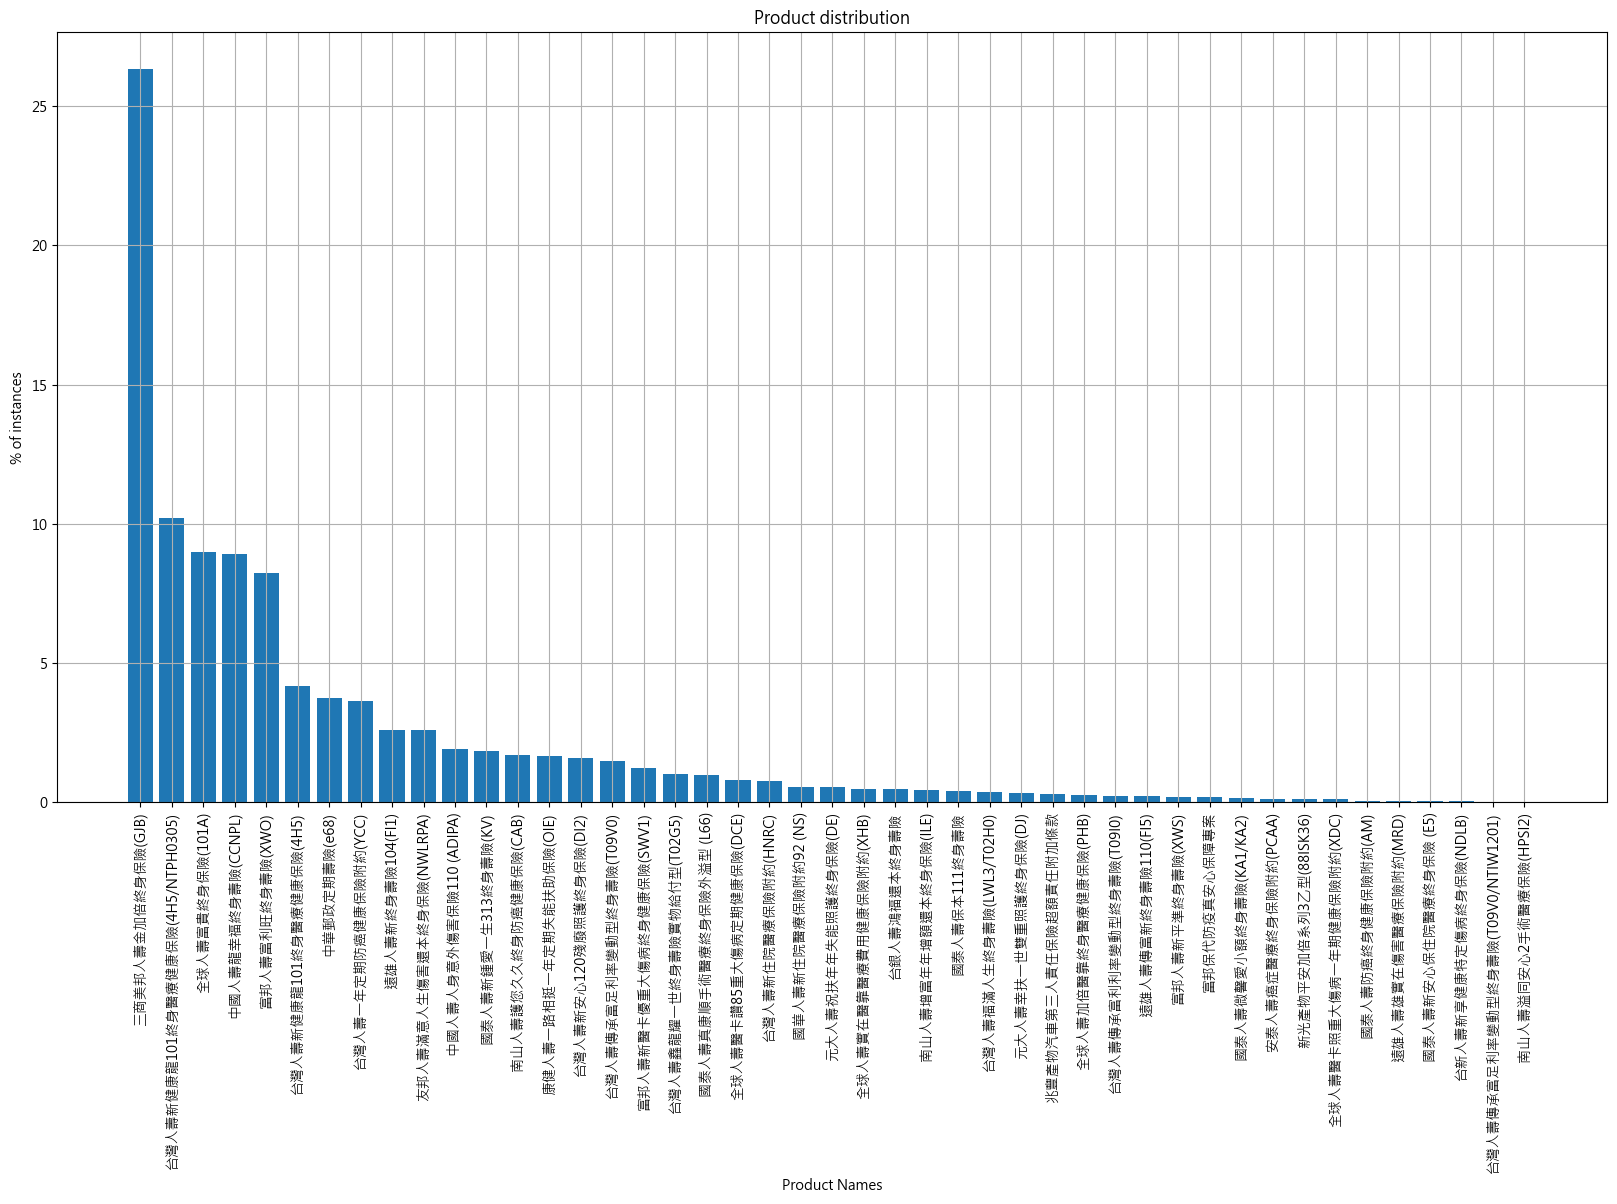

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# the histogram of the data
labels = insurance_data['商品名稱'].unique()
post_total = len(insurance_data)
df1 = insurance_data.groupby(['商品名稱']).count()['text']
df1 = df1.sort_values(ascending=False)
df1 = df1.apply(lambda x: round(x*100/post_total, 3))

#plot
fig, ax = plt.subplots(figsize=(20,10))
plt.bar(df1.index, df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Product Names')
plt.xticks(rotation=90)
plt.title('Product distribution')
plt.grid(True)
plt.show()

---

## Feature Engineering

In [11]:
train_df = insurance_data.sample(frac=0.8, random_state=42).sort_index()
test_df = insurance_data.drop(train_df.index).sort_index()

In [12]:
print("The shape of training data:", train_df.shape)
print("The shape of testing data:", test_df.shape)

print("The info of training data:", train_df.info())
print("The info of testing data:", test_df.info())

The shape of training data: (3928, 3)
The shape of testing data: (982, 3)
<class 'pandas.core.frame.DataFrame'>
Index: 3928 entries, 0 to 4998
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   討論內容    3928 non-null   object
 1   商品名稱    3928 non-null   object
 2   text    3928 non-null   object
dtypes: object(3)
memory usage: 122.8+ KB
The info of training data: None
<class 'pandas.core.frame.DataFrame'>
Index: 982 entries, 3 to 4993
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   討論內容    982 non-null    object
 1   商品名稱    982 non-null    object
 2   text    982 non-null    object
dtypes: object(3)
memory usage: 30.7+ KB
The info of testing data: None


In [13]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
# step 1
vectoerizer = CountVectorizer(token_pattern='\\b\\w+\\b')
# step 2
vectoerizer.fit(train_df["text"])
# step 3
bag_of_words = vectoerizer.get_feature_names_out()
print("Bag of words:")
print(bag_of_words)
print(len(bag_of_words))
# step 4
X = vectoerizer.transform(train_df["text"])
print("Vectorized corpus:")
print(X.toarray())
# step 5

Bag of words:
['0' '00' '000' ... 'ｖ' 'ｗ' 'ｘ']
18363
Vectorized corpus:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [14]:
# step 1
tfidf_transformer = TfidfTransformer()
# step 2
tfidf_transformer.fit(X.toarray())
# step 3
for idx, word in enumerate(vectoerizer.get_feature_names_out()):
  print("{}\t{}".format(word, tfidf_transformer.idf_[idx]))
# step 4
tfidf = tfidf_transformer.transform(X)
print(tfidf.toarray())

0	6.098086389210514
00	8.582993038998515
000	5.514940103864897
0002	8.582993038998515
000549	8.582993038998515
00225	8.582993038998515
005	8.582993038998515
01	8.582993038998515
0126	7.889845858438569
016	8.582993038998515
02	8.582993038998515
025	8.582993038998515
03	7.66670230712436
0375	8.582993038998515
039	8.582993038998515
03cm	8.582993038998515
0478b44a161	8.582993038998515
05	7.07891564222224
050	8.582993038998515
06352	8.582993038998515
074	8.582993038998515
075	7.889845858438569
0765	8.582993038998515
080	7.889845858438569
0800	6.385768461662295
0800000662	8.582993038998515
0827	8.582993038998515
09	8.17752793089035
0a	8.582993038998515
1	2.4029763853459416
10	3.8080800784233286
100	3.877977518040707
1000	4.505455595092795
10000	6.711190862096923
100000	7.889845858438569
100001212000	8.582993038998515
10001010000	8.582993038998515
1000121200	8.582993038998515
100020002060	8.582993038998515
10003	8.17752793089035
100033000	8.582993038998515
100044000	8.582993038998515
10005500

C:\Users\Ying Tung\AppData\Local\Temp\ipykernel_27104\653501990.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(g.get_yticks(), size = 25)
C:\Users\Ying Tung\AppData\Local\Temp\ipykernel_27104\653501990.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(word_freq_train.columns[:30], fontsize=25);


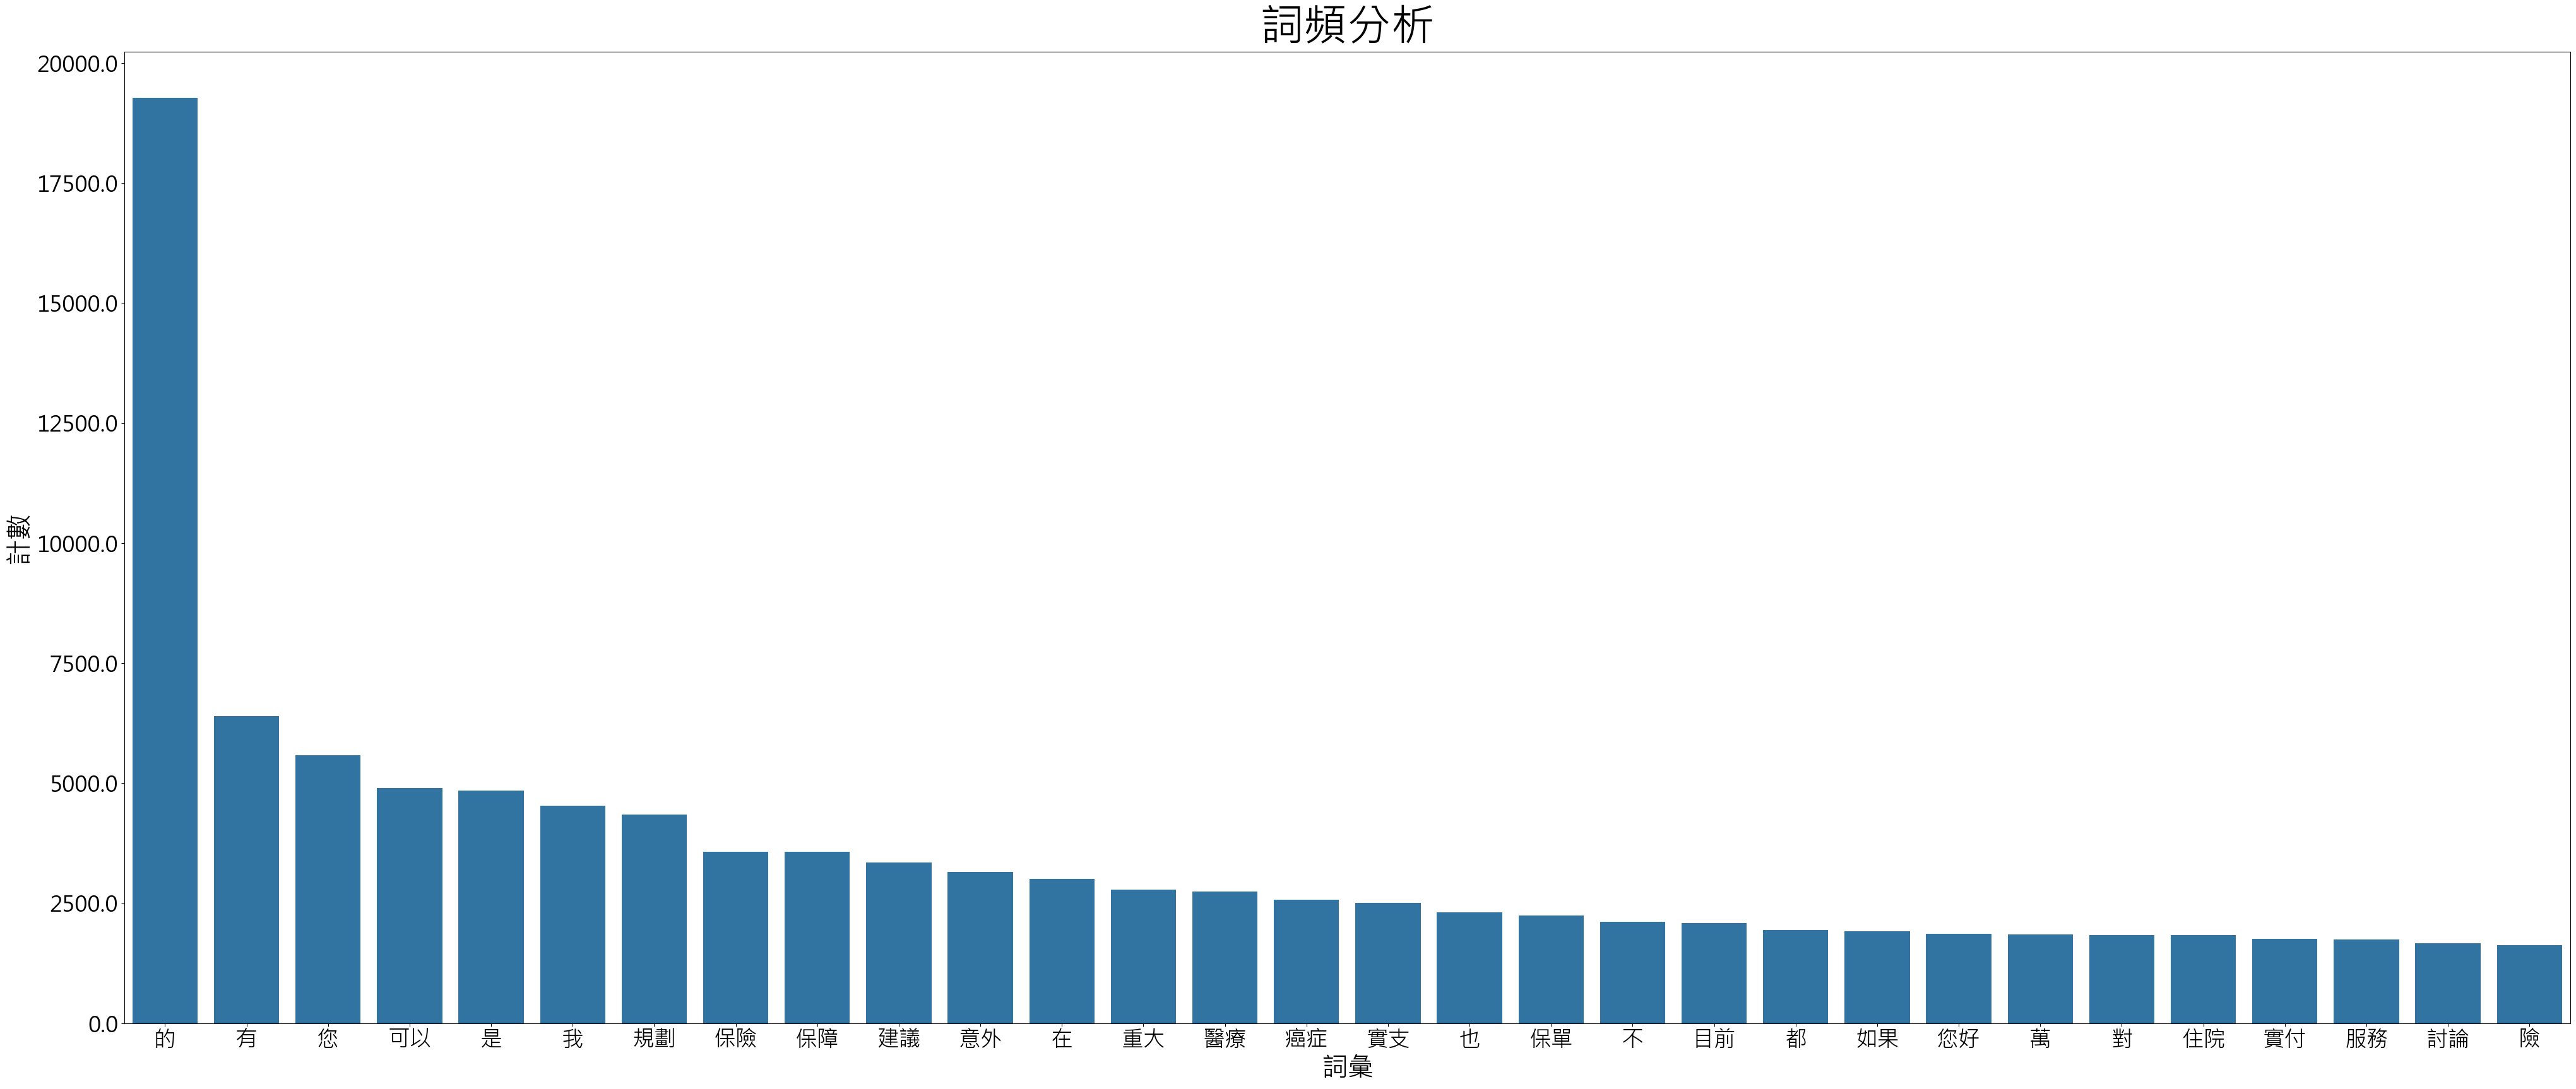

In [15]:
word_freq_train = (pd.DataFrame(X.toarray().sum(axis=0), bag_of_words)).transpose()
word_freq_train
word_freq_train = word_freq_train.sort_values(by = [0], axis = 1, ascending = False)

plt.subplots(figsize=(50, 20))
g = sns.barplot(x = word_freq_train.columns[:30], 
                y = word_freq_train.loc[0][:30])
g.axes.set_title("詞頻分析",fontsize=50)
g.set_xlabel("詞彙",fontsize=30)
g.set_ylabel("計數",fontsize=30)
g.set_yticklabels(g.get_yticks(), size = 25)
g.set_xticklabels(word_freq_train.columns[:30], fontsize=25);


In [16]:
vectoerizer.fit(train_df["text"])
# for a classificaiton problem, you need to provide both training & testing data
X_train = tfidf_transformer.transform(vectoerizer.transform(train_df["text"]).toarray()).todense()
#X_train = vectoerizer.transform(train_df["text"])
y_train = train_df['商品名稱']

X_test = tfidf_transformer.transform(vectoerizer.transform(test_df["text"]).toarray()).todense()
#X_test = vectoerizer.transform(test_df["text"])
y_test = test_df['商品名稱']

## take a look at data dimension
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3928, 18363)
y_train.shape:  (3928,)
X_test.shape:  (982, 18363)
y_test.shape:  (982,)


In [17]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks

In [18]:
X_train, y_train = RandomOverSampler().fit_resample(np.asarray(X_train), np.asarray(y_train))

In [19]:
X_train, y_train = TomekLinks().fit_resample(X_train, y_train)

In [20]:
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (45978, 18363)
y_train.shape:  (45978,)
X_test.shape:  (982, 18363)
y_test.shape:  (982,)


In [21]:
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

In [22]:
# import matplotlib.pyplot as plt
# plt.figure( figsize=(20, 10) )
# y_train.value_counts().plot( kind='pie', autopct='%1.2f%%' )
# plt.ylabel( '' )
# plt.show()

## Decision Tree Classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn import tree

In [24]:
## build DecisionTree model
dt_model = DecisionTreeClassifier()
## train
dt_model = dt_model.fit(X_train, y_train)

In [28]:
## predict
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(np.asarray(X_test))

In [34]:
# 評估模型
accuracy = accuracy_score(y_test, y_test_pred)
print("準確度：", accuracy)

# 顯示混淆矩陣
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("混淆矩陣：\n", conf_matrix)

# 顯示分類報告
class_report = classification_report(y_test, y_test_pred)
print("分類報告：\n", class_report)

準確度： 0.38085539714867617
混淆矩陣：
 [[129   5   8 ...   0   3   0]
 [  2   5   0 ...   0   0   0]
 [ 10   1  52 ...   1   0   0]
 ...
 [  0   0   1 ...   2   0   0]
 [ 10   0   1 ...   0   7   0]
 [  1   0   0 ...   0   0   0]]
分類報告：
                                    precision    recall  f1-score   support

               三商美邦人壽金加倍終身保險(GJB)       0.49      0.52      0.50       248
          中國人壽人身意外傷害保險110 (ADIPA)       0.25      0.33      0.29        15
               中國人壽龍幸福終身壽險(CCNPL)       0.51      0.57      0.54        91
                    中華郵政定期壽險(e68)       0.33      0.40      0.36        35
             元大人壽幸扶一世雙重照護終身保險(DJ)       0.67      0.40      0.50         5
             元大人壽祝扶年年失能照護終身保險(DE)       0.00      0.00      0.00         3
            兆豐產物汽車第三人責任保險超額責任附加條款       0.25      0.33      0.29         3
            全球人壽加倍醫靠終身醫療健康保險(PHB)       0.00      0.00      0.00         3
                 全球人壽富貴終身保險(101A)       0.31      0.26      0.28        93
          全球人壽實在醫靠

c:\Users\Ying Tung\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ying Tung\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ying Tung\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(aver

---

## XGBoost

In [40]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

In [41]:
xg_model = XGBClassifier(learning_rate=0.05, n_estimators=300,
                         max_depth = 8, subsample=0.8)

In [51]:
le = LabelEncoder()
y_test_enc = le.fit_transform(np.asarray(y_test))
y_train_enc = le.fit_transform(y_train)

In [52]:
xg_model.fit(X_train, y_train_enc)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [53]:
y_train_xgpred = xg_model.predict(X_train)
y_test_xgpred = xg_model.predict(np.asarray(X_test))

In [54]:
xgacc_train = accuracy_score(y_true=y_train_enc, y_pred=y_train_xgpred)
xgacc_test = accuracy_score(y_true=y_test_enc, y_pred=y_test_xgpred)

print('training accuracy: {}'.format(round(xgacc_train, 3)))
print('testing accuracy: {}'.format(round(xgacc_test, 3)))

training accuracy: 0.998
testing accuracy: 0.317


In [55]:
# 評估模型
accuracy = accuracy_score(le.inverse_transform(y_test_enc), le.inverse_transform(y_test_xgpred))
print("準確度：", accuracy)

# 顯示混淆矩陣
conf_matrix = confusion_matrix(le.inverse_transform(y_test_enc), le.inverse_transform(y_test_xgpred))
print("混淆矩陣：\n", conf_matrix)

# 顯示分類報告
class_report = classification_report(le.inverse_transform(y_test_enc), le.inverse_transform(y_test_xgpred))
print("分類報告：\n", class_report)

準確度： 0.3167006109979633
混淆矩陣：
 [[195   4   9 ...   0   0   1]
 [  5   3   2 ...   0   0   0]
 [  8   0  65 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
分類報告：
                                    precision    recall  f1-score   support

               三商美邦人壽金加倍終身保險(GJB)       0.58      0.79      0.67       248
          中國人壽人身意外傷害保險110 (ADIPA)       0.23      0.20      0.21        15
               中國人壽龍幸福終身壽險(CCNPL)       0.54      0.71      0.62        91
                    中華郵政定期壽險(e68)       0.52      0.49      0.50        35
             元大人壽幸扶一世雙重照護終身保險(DJ)       1.00      0.20      0.33         5
             元大人壽祝扶年年失能照護終身保險(DE)       0.00      0.00      0.00         3
            兆豐產物汽車第三人責任保險超額責任附加條款       0.00      0.00      0.00         3
            全球人壽加倍醫靠終身醫療健康保險(PHB)       0.00      0.00      0.00         3
                 全球人壽富貴終身保險(101A)       0.36      0.27      0.31        93
          全球人壽實在醫靠醫

c:\Users\Ying Tung\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ying Tung\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ying Tung\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(aver

---

## Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

# 創建隨機森林分類器
rf_model = RandomForestClassifier(n_estimators=300, random_state=42)
# 訓練模型
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=42)

In [49]:
# 預測
y_rfpred = rf_model.predict(np.asarray(X_test))

In [50]:
# 評估模型
accuracy = accuracy_score(y_test, y_rfpred)
print("準確度：", accuracy)

# 顯示混淆矩陣
conf_matrix = confusion_matrix(y_test, y_rfpred)
print("混淆矩陣：\n", conf_matrix)

# 顯示分類報告
class_report = classification_report(y_test, y_rfpred)
print("分類報告：\n", class_report)

準確度： 0.4938900203665988
混淆矩陣：
 [[210   0   8 ...   0   0   0]
 [  8   2   0 ...   0   0   0]
 [ 13   0  60 ...   0   2   0]
 ...
 [  0   0   1 ...   2   0   0]
 [  7   0   3 ...   0  11   0]
 [  0   0   0 ...   0   0   0]]
分類報告：
                                    precision    recall  f1-score   support

               三商美邦人壽金加倍終身保險(GJB)       0.48      0.85      0.61       248
          中國人壽人身意外傷害保險110 (ADIPA)       0.29      0.13      0.18        15
               中國人壽龍幸福終身壽險(CCNPL)       0.47      0.66      0.55        91
                    中華郵政定期壽險(e68)       0.50      0.40      0.44        35
             元大人壽幸扶一世雙重照護終身保險(DJ)       1.00      0.40      0.57         5
             元大人壽祝扶年年失能照護終身保險(DE)       0.00      0.00      0.00         3
            兆豐產物汽車第三人責任保險超額責任附加條款       0.00      0.00      0.00         3
            全球人壽加倍醫靠終身醫療健康保險(PHB)       0.00      0.00      0.00         3
                 全球人壽富貴終身保險(101A)       0.35      0.24      0.28        93
          全球人壽實在醫靠醫

c:\Users\Ying Tung\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ying Tung\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ying Tung\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_